In [1]:
import os
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
# import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
                            roc_auc_score, confusion_matrix, classification_report, \
                            matthews_corrcoef, cohen_kappa_score, log_loss

C:\Users\User\anaconda3\envs\nlp\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


## 유효 문서 전처리 후 특정 컬럼 값 통합 dataframe 생성

In [ ]:
valid_df1 = pd.read_excel('./dataset/valid/valid1.xls')
valid_df2 = pd.read_excel('./dataset/valid/valid2.xls')
valid_df3 = pd.read_excel('./dataset/valid/valid3.xls')
valid_df4 = pd.read_excel('./dataset/valid/valid4.xls')
valid_df5 = pd.read_excel('./dataset/valid/valid5.xls')
valid_df6 = pd.read_excel('./dataset/valid/valid6.xls')
valid_df7 = pd.read_excel('./dataset/valid/valid7.xls')
valid_df8 = pd.read_excel('./dataset/valid/valid8.xls')

In [ ]:
valid_df1.head()

In [ ]:
valid_list = [valid_df1[['요약']],valid_df2[['요약']],valid_df3[['요약']],valid_df4[['요약']],valid_df5[['요약']],valid_df6[['요약']],valid_df7[['요약']],valid_df8[['요약']]]

In [ ]:
valid_df = pd.concat(valid_list,ignore_index=True)

In [ ]:
valid_df['label'] = 1

In [ ]:
valid_df

In [ ]:
valid_df.info()

## 비유효 문서 전처리 후 특정 컬럼 값 통합 dataframe 생성

In [ ]:
invalid_df1 = pd.read_excel('./dataset/invalid/invalid1.xls')
invalid_df2 = pd.read_excel('./dataset/invalid/invalid2.xls')
invalid_df3 = pd.read_excel('./dataset/invalid/invalid3.xls')
invalid_df4 = pd.read_excel('./dataset/invalid/invalid4.xls')
invalid_df5 = pd.read_excel('./dataset/invalid/invalid5.xls')

In [ ]:
invalid_list = [invalid_df1[['요약']],invalid_df2[['요약']],invalid_df3[['요약']],invalid_df4[['요약']],invalid_df5[['요약']]]

In [ ]:
invalid_df = pd.concat(invalid_list, ignore_index=True)

In [ ]:
invalid_df['label'] = 0

In [ ]:
invalid_df

In [ ]:
invalid_df.info()

In [ ]:
doc_df = pd.concat([valid_df, invalid_df], ignore_index=True)

In [ ]:
doc_df

## 통합 데이터 셋을 csv file로 저장

In [ ]:
doc_df.to_csv('preprocessed.csv', encoding='utf-8-sig')

In [ ]:
check_df = pd.read_csv('preprocessed.csv', index_col=0)
check_df

In [ ]:
check_df.rename(columns={'요약':'sentence'}, inplace=True)
check_df

In [ ]:
### 결측치 확인
check_df.info()

In [ ]:
### 결측치 제거
check_df.replace(' ', np.nan)
df_tmp = check_df.dropna()

In [ ]:
### 결측치 제거 확인
df_tmp.info()

In [ ]:
invalid_sentence_list = list(df_tmp[df_tmp.sentence.apply(len)<10].index)
invalid_sentence_list

In [ ]:
df = df_tmp.drop(invalid_sentence_list)

df

## 전처리 완료 데이터를 csv file로 저장

In [ ]:
# df.to_csv('preprocessed_final.csv', encoding='utf-8-sig')

In [2]:
df = pd.read_csv('preprocessed_final.csv', index_col=0)
df

,sentence,label
0,"본 발명은 2종 이상의 생약 추출물을 유효성분으로 포함하는, 면역력 증진용 조성물 ...",1
1,본 발명은 타히보 추출물 및 팔각회향을 유효성분으로 포함하는 면역 증진용 조성물에 ...,1
2,"본 출원은 신규한 터키 겨우살이의 추출물, 렉틴 및 상기 추출물 또는 렉틴의 제조방...",1
3,"아로니아(Aronia) 열매 추출물, 댕댕이나무(Lonicera caerulea) ...",1
4,본 발명의 청각 추출물 및 홍삼 추출물을 포함하는 선천성 면역 증진용 조성물에 관한...,1
...,...,...
13110,"히카마 및 루바브의 항산화 효능을 함유하고, 여주의 쓴맛을 보완하기 위해 설탕의 대...",0
13111,본 발명은 주 영양성분이 열량 탄수화물인 떡볶이 떡에 항비만 및 항당뇨 등에 효과가...,0
13112,본 발명은 상백피 추출물이 함유된 떡볶이 소스 및 그 제조방법에 관한 것으로 더욱 ...,0
13113,"본 발명은 AMPK 활성을 가지는 청국장 펩타이드에 관한 것으로서, 더욱 상세하게는...",0


### 데이터 분포 확인

In [ ]:
df.label.value_counts().plot(kind='bar')
plt.xlabel("label")
plt.ylabel("number")

In [ ]:
df.label.value_counts(normalize=True).plot(kind='bar')
plt.xlabel("label")
plt.ylabel("number")

In [ ]:
df.label.value_counts(normalize=True)

## text classification 모델 학습

### train/test 데이터 분리

In [3]:
# 입출력 데이터 분리
x_data = df['sentence']
y_data = df['label']

# split dataset
TEST_SIZE = 0.2
RANDOM_STATE = 99

# strtify이용 , 데이터 분리 이전의 라벨별 분포 고려
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y_data)

In [4]:
# 데이터 분리 확인
print(f"the number of train data = {len(x_train)}")
print(f"the number of test data = {len(x_test)}")

# 훈련 데이터 라벨별 비율
print(y_train.value_counts(normalize=True))

# 테스트 데이터 라벨별 비율
print(y_test.value_counts(normalize=True))

the number of train data = 10453
the number of test data = 2614
1    0.612169
0    0.387831
Name: label, dtype: float64
1    0.612089
0    0.387911
Name: label, dtype: float64


### GPU 작동확인

In [5]:
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
  print("GPU 작동 중")
  mirrored_strategy = tf.distribute.MirroredStrategy()
else:
  print("GPU 미작동 중")

GPU 작동 중
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


### 언어모델 및 Tokenizer 불러오기

In [6]:
MODEL_NAME = "klue/bert-base"
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2, from_pt=True)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 적절한 입력 문장 길이 설정

In [10]:
# tokenizing을 통해 입력 token의 수 확인
# 입력 파라미터인 텍스트 데이터는 반드시 List 형태로 입력해야 tokenizer가 작동함(dataframe 형태는 안됨)

train_encodings = tokenizer(x_train.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(x_test.tolist(), truncation=True, padding=True)

In [11]:
train_encodings.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [12]:
num_train_tokens_len = [len(sent) for sent in train_encodings['input_ids']]
num_val_tokens_len = [len(sent) for sent in val_encodings['input_ids']]

print('문장 tokens 개수 최대 값: {}'.format(np.max(num_train_tokens_len)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(num_train_tokens_len)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(num_train_tokens_len)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(num_train_tokens_len)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(num_train_tokens_len, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(num_train_tokens_len, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(num_train_tokens_len, 99)))

print('문장 tokens 개수 최대 값: {}'.format(np.max(num_val_tokens_len)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(num_val_tokens_len)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(num_val_tokens_len)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(num_val_tokens_len)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(num_val_tokens_len, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(num_val_tokens_len, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(num_val_tokens_len, 99)))

문장 tokens 개수 최대 값: 470
문장 tokens 개수 평균 값: 470.00
문장 tokens 개수 표준편차: 0.00
문장 tokens 개수 중간 값: 470.0
문장 tokens 개수 제 1 사분위: 470.0
문장 tokens 개수 제 3 사분위: 470.0
문장 tokens 개수 99 퍼센트: 470.0
문장 tokens 개수 최대 값: 449
문장 tokens 개수 평균 값: 449.00
문장 tokens 개수 표준편차: 0.00
문장 tokens 개수 중간 값: 449.0
문장 tokens 개수 제 1 사분위: 449.0
문장 tokens 개수 제 3 사분위: 449.0
문장 tokens 개수 99 퍼센트: 449.0


In [13]:
# 입력 데이터(문장) 길이 제한
MAX_SEQ_LEN = 470
# MAX_SEQ_LEN = 380

### BERT 입력용 데이터 포맷으로 변경

In [14]:
def convert_data(X_data, y_data):
    # BERT 입력으로 들어가는 token, mask, segment, target 저장용 리스트
    tokens, masks, segments, targets = [], [], [], []
    
    for X, y in tqdm(zip(X_data, y_data)):
        # token: 입력 문장 토큰화
        token = tokenizer.encode(X, truncation = True, padding = 'max_length', max_length = MAX_SEQ_LEN)
        
        # Mask: 토큰화한 문장 내 패딩이 아닌 경우 1, 패딩인 경우 0으로 초기화
        num_zeros = token.count(0)
        mask = [1] * (MAX_SEQ_LEN - num_zeros) + [0] * num_zeros
        
        # segment: 문장 전후관계 구분: 오직 한 문장이므로 모두 0으로 초기화
        segment = [0]*MAX_SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        targets.append(y)

    # numpy array로 저장
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

In [15]:
# train 데이터를 Bert의 Input 타입에 맞게 변환
train_x, train_y = convert_data(x_train, y_train)

10453it [00:08, 1201.27it/s]


In [16]:
# test 데이터를 Bert의 Input 타입에 맞게 변환
test_x, test_y = convert_data(x_test, y_test)

2614it [00:02, 1187.86it/s]


### model finetuning

In [25]:
# token, mask, segment 입력 정의
token_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_ids')
mask_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_masks')
segment_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_segment')
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

In [26]:
bert_outputs

TFSequenceClassifierOutput(loss=None, logits=<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'tf_bert_for_sequence_classification')>, hidden_states=None, attentions=None)

In [27]:
bert_output = bert_outputs[0]
bert_output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'tf_bert_for_sequence_classification')>

In [28]:
DROPOUT_RATE = 0.5
NUM_CLASS = 2
dropout = tf.keras.layers.Dropout(DROPOUT_RATE)(bert_output)
# binary classification 문제이므로 activation function은 sigmoid 설정
classification_layer = tf.keras.layers.Dense(NUM_CLASS, activation='sigmoid', kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev=0.02))(dropout)
# classification_layer = tf.keras.layers.Dense(NUM_CLASS, activation='softmax', kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev=0.02))(dropout)
classification_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], classification_layer)

In [29]:
# 옵티마이저 Rectified Adam 하이퍼파리미터 조정
OPTIMIZER_NAME = 'RAdam'
LEARNING_RATE = 5e-5
TOTAL_STEPS = 10000
MIN_LR = 1e-5
WARMUP_PROPORTION = 0.1
EPSILON = 1e-8
CLIPNORM = 1.0
optimizer = tfa.optimizers.RectifiedAdam(learning_rate = LEARNING_RATE,
                                          total_steps = TOTAL_STEPS, 
                                          warmup_proportion = WARMUP_PROPORTION, 
                                          min_lr = MIN_LR, 
                                          epsilon = EPSILON,
                                          clipnorm = CLIPNORM)

In [30]:
# 분류 모델 컴파일
classification_model.compile(optimizer = optimizer, 
                             loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
                             metrics = ['accuracy'])

In [31]:
# 조기종료 조건

MIN_DELTA = 1e-3
PATIENCE = 5

early_stopping = EarlyStopping(
    monitor = "val_accuracy", 
    min_delta = MIN_DELTA,
    patience = PATIENCE)

In [32]:
# 최고 성능 모델 저장

BEST_MODEL_NAME = './model/klue_base_maxlen_best_model.h5'

model_checkpoint = ModelCheckpoint(
    filepath = BEST_MODEL_NAME,
    monitor = "val_loss",
    mode = "min",
    save_best_only = True, # 성능 향상 시에만 모델 저장
    verbose = 1
)

In [33]:
callbacks = [early_stopping, model_checkpoint]

In [36]:
# 특허 분류 모델 학습

EPOCHS = 300
BATCH_SZIE = 16

In [37]:
classification_model.fit(train_x, train_y, 
                         epochs = EPOCHS, 
                         shuffle = True, 
                         batch_size = BATCH_SZIE, 
                         validation_data = (test_x, test_y),
                         callbacks = callbacks
                        )

Epoch 1/300
654/654 [==============================] - ETA: 0s - loss: 0.6083 - accuracy: 0.6960
Epoch 1: val_loss improved from inf to 0.46154, saving model to ./model\klue_base_maxlen_best_model.h5
654/654 [==============================] - 386s 589ms/step - loss: 0.6083 - accuracy: 0.6960 - val_loss: 0.4615 - val_accuracy: 0.8569
Epoch 2/300
654/654 [==============================] - ETA: 0s - loss: 0.4283 - accuracy: 0.8248
Epoch 2: val_loss improved from 0.46154 to 0.33698, saving model to ./model\klue_base_maxlen_best_model.h5
654/654 [==============================] - 380s 582ms/step - loss: 0.4283 - accuracy: 0.8248 - val_loss: 0.3370 - val_accuracy: 0.8730
Epoch 3/300
654/654 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.8373
Epoch 3: val_loss improved from 0.33698 to 0.31157, saving model to ./model\klue_base_maxlen_best_model.h5
654/654 [==============================] - 381s 583ms/step - loss: 0.3683 - accuracy: 0.8373 - val_loss: 0.3116 - val_accu

## 문서 분류 모델의 성능 평가

In [ ]:
# 최고 성능의 모델 불러오기 - sigmoid
classification_model_best = tf.keras.models.load_model(BEST_MODEL_NAME,
                                                       custom_objects={'TFBertForSequenceClassification': TFBertForSequenceClassification})

In [38]:
# 최고 성능의 모델 불러오기 - sigmoid, maxlen
classification_model_best = tf.keras.models.load_model(BEST_MODEL_NAME,
                                                       custom_objects={'TFBertForSequenceClassification': TFBertForSequenceClassification})

In [39]:
# 모델이 예측한 라벨 도출
predicted_value = classification_model_best.predict(test_x)
predicted_label = np.argmax(predicted_value, axis = 1)

82/82 [==============================] - 24s 267ms/step


In [ ]:
### klue_bert_sigmoid_base 모델에 대한 성능 검증 - Classification Report

cl_report = classification_report(test_y, predicted_label, output_dict = True)
cl_report_df = pd.DataFrame(cl_report).transpose()
cl_report_df = cl_report_df.round(3)
print(cl_report_df)

In [41]:
### klue_bert_sigmoid_maxlen_base 모델에 대한 성능 검증 - Classification Report

cl_report = classification_report(test_y, predicted_label, output_dict = True)
cl_report_df = pd.DataFrame(cl_report).transpose()
cl_report_df = cl_report_df.round(3)
print(cl_report_df)

              precision  recall  f1-score   support
0                 0.933   0.853     0.891  1014.000
1                 0.912   0.961     0.936  1600.000
accuracy          0.919   0.919     0.919     0.919
macro avg         0.922   0.907     0.914  2614.000
weighted avg      0.920   0.919     0.919  2614.000


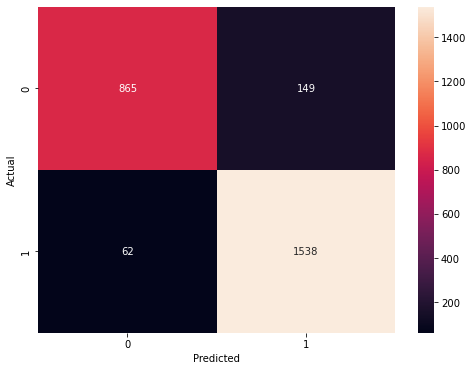

In [42]:
### klue_bert_sigmoid_base 모델에 대한 성능 검증 - confusion_matrix
cf_matrix = confusion_matrix(test_y, predicted_label)
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(cf_matrix, annot = True, fmt = 'd')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig(FIGURE_FILE)
plt.show()